<a href="https://colab.research.google.com/github/partha6666/Machine-Learning-Internship-Project-by-Partha-Nath/blob/master/Machine_Learning_Internship_Project_by_Partha_Nath.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title : Exploratory Data Analysis of Car Features


My First Machine Learning Project 

By PARTHA NATH

Acknowledgement : I am most obliged and grateful to Internship Studio, my parents and my mentor Mr. Malineni Maurya

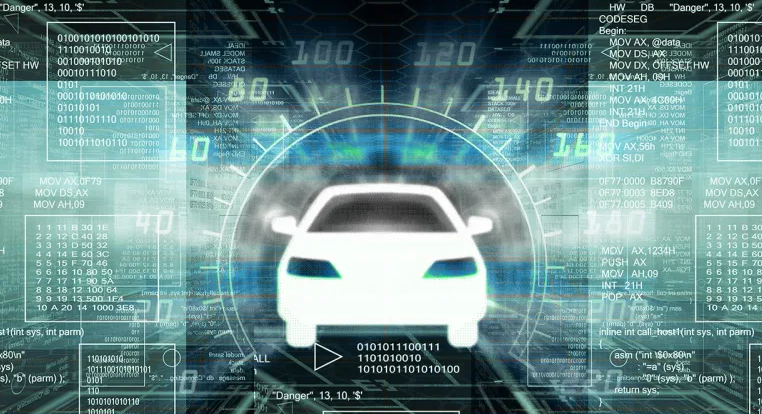

Context :  In this project,I am expected to perform Exploratory data
Analysis on how the different features of a car and its price are related. The data comes
from the Kaggle dataset "Car Features and MSRP". It describes almost 12,000 car
models, sold in the USA between 1990 and 2017, with the market price (new or used)
and some features.


Objective :
The objective of the project is to do data pre-processing and exploratory data analysis
of the dataset.

Intro : 
Exploratory Data Analysis (EDA) is used :


*   To give insight into a dataset
*   Understand the underlying structure


*   Extract important parameters and relationships that holds between them

Thus EDA is an approach for summarizing, visualizing, and becoming intimately familiar with the important characteristics of a dataset.






# 1.Importing the required libraries and dataset for EDA

In [ ]:
import pandas as pd                 #For data manipulation and analysis
import numpy as np                  #Perform mathematical operations on arrays
import seaborn as sns               #Data visualization library
import matplotlib.pyplot as plt     #For comprehensive 2D/3D plotting
%matplotlib inline                  

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


A CSV file is the most common, simple and easiest method to store tabular data. This particular format arranges tables by following a specific
structure divided into rows and columns.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


# 1.1 Loading the data into the data frame

In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['data.csv']))  #reading the csv file

In [ ]:
# To display the top 5 rows
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
# To display the bottom 5 rows
df.tail(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


# 1.2 Checking the datatype and basic summary stats

If the MSRP or the price of the car is stored as string, we have to convert that string into integer so that we can plot the data via a graph. Here, in this case, the data is already in integer format.

In [ ]:
# To find what all columns it contains, of what data types and if they contain any value in it or not
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [ ]:
# Provides the count, mean, standard deviation, minimum, maximum values and other stats of each columns.
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [ ]:
# Get the total number of rows and columns
df.shape

(11914, 16)

In [ ]:
# check whether null values exist
df.isna()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11910,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11911,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11912,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# 2.Dropping irrelevant columns

Sometimes there are columns which does not give necessary informations and therefore we need to drop them. In this case, the columns such as Engine Fuel Type, Number of doors, and Market Category may not be relevant.

In [ ]:
# axis=1 indicates the columns
#drop function deletes the specified rows or columns
df = df.drop(['Engine Fuel Type', 'Number of Doors', 'Market Category'], axis=1)
df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


# 3.Renaming the columns

Sometimes, column names may be confusing or not understandable. So it is a good practice to rename column names as it improves the readability of the data set.

In [ ]:
#Renames the specified columns or rows
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Driven Mode", "highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })
df.head()  #by default it returns the first 5 rows

,Make,Model,Year,HP,Cylinders,Transmission,Driven Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


#4 Dropping the duplicate rows

Many real world datasets are huge and often have some duplicate data. Here the data set contains more than 10000 rows and we have to remove the duplicate values from the data set since it does not provide any necessary information.

In [ ]:
#First check the total number or rows and columns
df.shape

(11914, 13)

In [ ]:
#Now check the number of duplicate rows
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_df.shape)

Number of duplicate rows:  (792, 13)


In [ ]:
#Now delete the duplicate rows
df = df.drop_duplicates()
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Driven Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


In [ ]:
#Now check the number of rows remaining after dropping the duplicate rows
df.shape

(11122, 13)

# 4.1 Dropping the missing or null values.

Many real world datasets contain missing values, often encoded as blanks, NaNs(Not a Number), or other placeholders. Such datasets however are incompatible with scikit-learn estimators which assumes that all values in an array are meaningful. 



Sometimes the missing values are replaced with the mean or average of the column which helps in fine tuning the model performance. However the objective of this project is to do EDA and its fine to drop the missing values since the number of missing values is small compared to the entire dataset. 

In [ ]:
print(df.isnull().sum()) #This will give the column-wise sum of missing values.

Make              0
Model             0
Year              0
HP               69
Cylinders        30
Transmission      0
Driven Mode       0
Vehicle Size      0
Vehicle Style     0
MPG-H             0
MPG-C             0
Popularity        0
Price             0
dtype: int64


Conclusion : The HP column in the dataset contain 69 missing values and Cylinders column consist 30 missing values. Therefore, there are 98 missing values

In [ ]:
df = df.dropna() #Delete missing values
df.count()       #This is used to count non-NA cells for each column or row.

Make             11024
Model            11024
Year             11024
HP               11024
Cylinders        11024
Transmission     11024
Driven Mode      11024
Vehicle Size     11024
Vehicle Style    11024
MPG-H            11024
MPG-C            11024
Popularity       11024
Price            11024
dtype: int64

In [ ]:
#Now again check whether the dataset contain any missing values.
print(df.isnull().sum())

Make             0
Model            0
Year             0
HP               0
Cylinders        0
Transmission     0
Driven Mode      0
Vehicle Size     0
Vehicle Style    0
MPG-H            0
MPG-C            0
Popularity       0
Price            0
dtype: int64


In [ ]:
df.shape

(11024, 13)

Conclsuion : After dropping the duplicate columns and missing or null values, the dataset contains 11024 rows and 13 columns

# 5.Detecting Outliers

There are certain things which, if are not done in EDA phase, can affect further statistical/Machine Learning modelling.One of them is finding 'Outliers'.

In statistics, an outlier is an observation point that is distant from other observations. It is something which is separate from the crowd.

Often outliers can be seen with visualizations using a box plot. The box plot of MSRP, Cylinders and Horsepower are shown below. In the following plots, the points outside the box are the outliers.

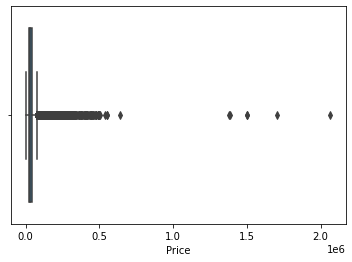

In [ ]:
#The seaborn boxplot is a very basic plot Boxplots are used to visualize distributions. 
sns.boxplot(x=df['Price'])

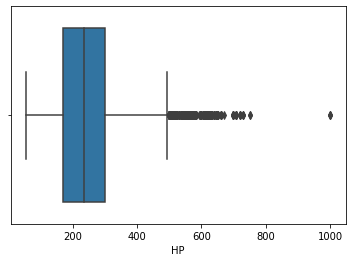

In [ ]:
sns.boxplot(x=df['HP'])

The middle line in the box indicates the median line

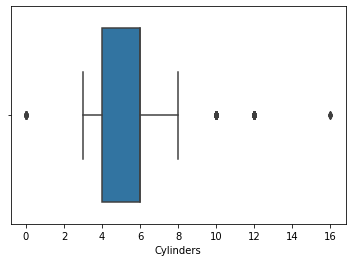

In [ ]:
sns.boxplot(x=df['Cylinders'])

Sometimes a boxplot is named a box-and-whisker plot. Any box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution.

In [ ]:
#The quantile() function is used to get values at the given quantile 
Q1 = df.quantile(0.25)  #Lower Quartile
Q3 = df.quantile(0.75)  #Upper Quartile
IQR = Q3 - Q1           #Inter Quartile Range
print(IQR)

Year              9.00
HP              131.00
Cylinders         2.00
MPG-H             8.00
MPG-C             6.00
Popularity     1460.00
Price         21426.25
dtype: float64


In [ ]:
#Remove the outliers(Here the outliers are the points which are 1.5 times away from Q1 and Q3)
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape          
          

(8546, 13)

Why 1.5? It has been shown that this is a reasonable rule for determining if a point is an outlier, for a variety of distributions.

# 6.What are the most represented car brands?

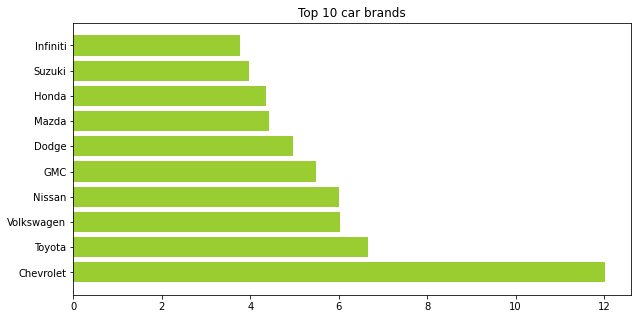

In [ ]:
#Percentage of car per brand
counts = df['Make'].value_counts()*100/sum(df['Make'].value_counts())
 
#Top 10 car brands
popular_brands = counts.index[:10]

#Plot
plt.figure(figsize=(10,5))                    #This creates a figure object, which has a width of 10 inches and 5 inches in height.
plt.barh(popular_brands, width=counts[:10], color = "yellowgreen")   #barh function is used to flip the graph horizontally
plt.title("Top 10 car brands")
plt.show()

In [ ]:
#Show the average price of each brand
prices = df[['Make','Price']].loc[(df['Make'] == 'Chevrolet')|
               (df['Make'] == 'Ford')|
               (df['Make'] == 'Volkswagen')|           
               (df['Make'] == 'Toyota')|
               (df['Make'] == 'Dodge')|
               (df['Make'] == 'Nissan')|
               (df['Make'] == 'GMC')|
               (df['Make'] == 'Honda')|
               (df['Make'] == 'Mazda')].groupby('Make').mean()
print(prices)               

                   Price
Make                    
Chevrolet   28142.855891
Dodge       26076.722353
GMC         33261.400853
Honda       27381.364611
Mazda       20495.820106
Nissan      28352.543860
Toyota      27769.421793
Volkswagen  29032.817476


# 7.Correlation Matrix

A correlation analysis provides information on the strength and direction of the linear relationship between two varibales. Thus, a correlation matrix is a table showing correlation coefficients between variables.

In [ ]:
df.corr()

,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.325104,-0.106597,0.373319,0.335236,0.200710,0.591439
HP,0.325104,1.000000,0.734094,-0.453451,-0.554768,0.095161,0.745852
Cylinders,-0.106597,0.734094,1.000000,-0.691395,-0.746361,0.013373,0.389049
MPG-H,0.373319,-0.453451,-0.691395,1.000000,0.936978,0.093002,-0.121262
MPG-C,0.335236,-0.554768,-0.746361,0.936978,1.000000,0.081110,-0.197330
Popularity,0.200710,0.095161,0.013373,0.093002,0.081110,1.000000,0.113604
Price,0.591439,0.745852,0.389049,-0.121262,-0.197330,0.113604,1.000000


Observations : 


*   There is a high correlation between Cylinders and HP (0.734094). Thus, the more cylinders there are, the more powerful the car is.
*   There is a high correlation between Highway MPG and City MPG (0.936978)


*   There is a high anticorrelation between Cylinders and Highway MPG (-0.691395). Thus, higher the number of cylinders, greater will be the performance and lesser will be the mileage.




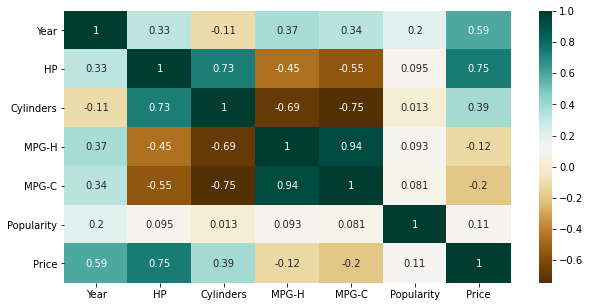

In [ ]:
plt.figure(figsize=(10,5))           #This creates a figure object, which has a width of 10 inches and 5 inches in height.
c = df.corr()
sns.heatmap(c,cmap="BrBG",annot=True) #This plots rectangular data as a color-encoded matrix.
                                      #cmap stands for Matplotlib colormap. Annot is an array of same shape as data which is used to annotate the heatmap.

Observation : Darker the boxes, higher is the correlation.
              Brighter the boxes, lower is the correlation.

# 8.Different types of Plots

# 8.1 Scatter Plot

A scatter plot uses dots to represent values for two different numeric variables. Below is the scatter plot between Horsepower and Price.

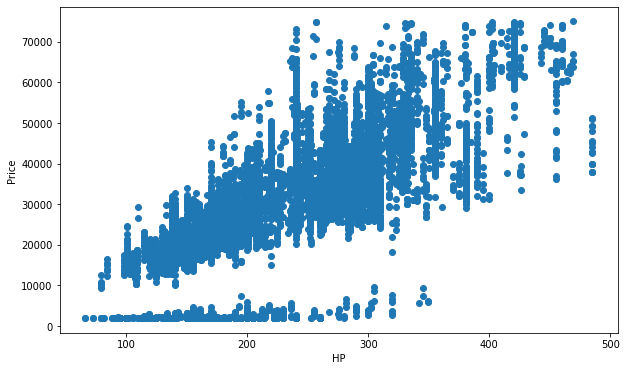

In [ ]:
fig, ax = plt.subplots(figsize=(10,6)) #Create a figure and a set of subplots.
ax.scatter(df['HP'],df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

Observation : The plot between HorsePower(HP) and Price shows a strong, positive and linear relationship.

# 8.2 Which vehicle style segment of car are mostly sold?

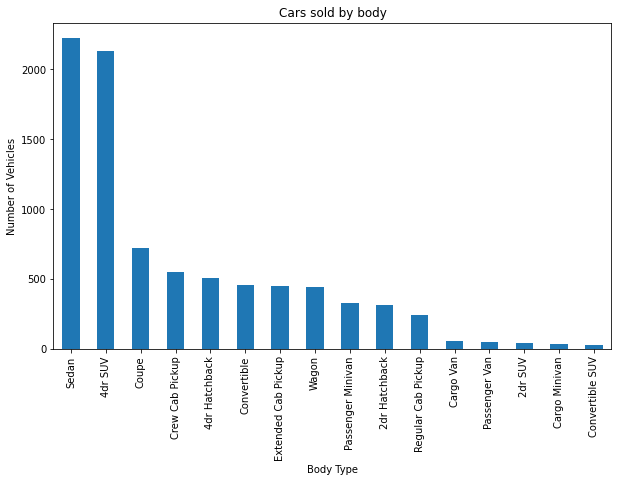

In [ ]:
df['Vehicle Style'].value_counts().plot.bar(figsize=(10,6))  #Bar charts are great at visualizing counts of categorical data.
plt.title("Cars sold by body")
plt.ylabel('Number of Vehicles')
plt.xlabel('Body Type');

Observation : Sedan cars were the most sold followed by 4dr SUV, Coupe and others.

# 8.3 Vehicle Type v/s Drive Mode Analysis

Text(0.5, 0, 'Count of Vehicles')

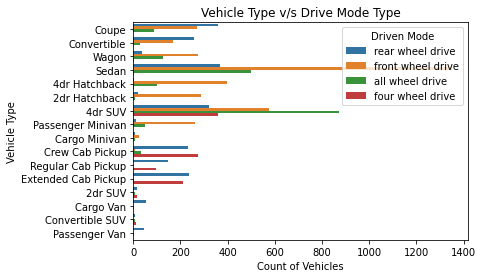

In [ ]:
sns.countplot(y='Vehicle Style',data=df, hue='Driven Mode')  #countplot() method is used to Show the counts of observations in each categorical bin using bars
plt.title("Vehicle Type v/s Drive Mode Type")
plt.ylabel('Vehicle Type')
plt.xlabel('Count of Vehicles')

Observation : Among Sedan, the Front wheel drive(marked yellow) is the most popular.

Among 4dr SUV, the All wheel drive(marked green) is the most popular

# 8.4 Making a new group called "Price_Group"

In [ ]:
#Create a new column and assign the value based on car price
df['Price_Group'] = pd.cut(df['Price'],[0,20000,40000,60000,80000,100000,600000], labels = ['<20K', '20-39K', '40-59K', '60-79K', '80-99K', '>100K'],include_lowest = True)
df['Price_Group'] = df['Price_Group'].astype(object)

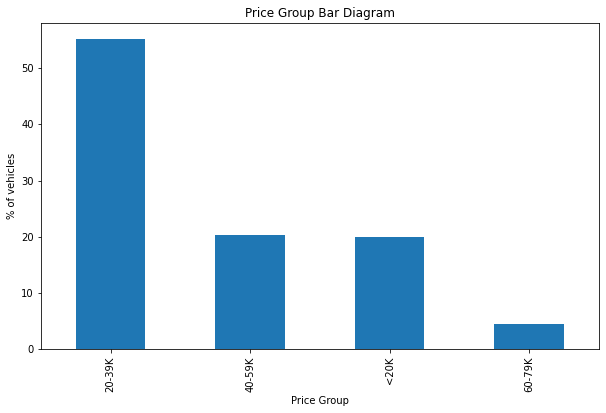

In [ ]:
(df['Price_Group'].value_counts() / len(df) * 100).plot.bar(figsize=(10,6))
plt.title("Price Group Bar Diagram")
plt.ylabel('% of vehicles')
plt.xlabel('Price Group');

It is good to group cars into multiple car segments.


Observation : More number of cars fall between the price range of 20-39K and less number of cars fall between the range of 60-79K

# 9.Base Machine Learning(ML) Model

Scikit Learn has wide range of ML Algorithms which have a consistent interface for fitting, predicting, accuracy, recall, etc.

As we are dealing with lots of data and data is in raw form, before inputting the data to ML algorithms, we need to convert it into meaningful data. This process is known as preprocessing the data.

Here, popularity, year, HP, cylinders, MPG-H, MPG-C are the feature(or independent) variable and price is the target(or dependent) variables.

In [ ]:
X = df[['Popularity', 'Year', 'HP', 'Cylinders', 'MPG-H', 'MPG-C']].values
y = df['Price'].values

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler #The idea behind StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1
sc_X = StandardScaler()                          #This function Standardize features by removing the mean and scaling to unit variance.
sc_y = StandardScaler()
X = sc_X.fit_transform(X)                        #fit_transform means to do some calculation and then do transformation
y = sc_y.fit_transform(y.reshape(-1,1))

To check the accuracy of our model, we can split the dataset into two pieces - a training set and a testing set. We use the training set to train the model and testing set to test the model. 

In [ ]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
#Here, 80% of the data will be used as training data and 20% of the data will be used as test data

Multiple Linear Regression(MLR) is a statistical technique that uses several explanatory variables to predict the outcome of a response variable.

In [ ]:
#Fitting Multiple Linear Regression(MLR) to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

The goal of MLR is to model the linear relationship between independent variables and dependent variable.

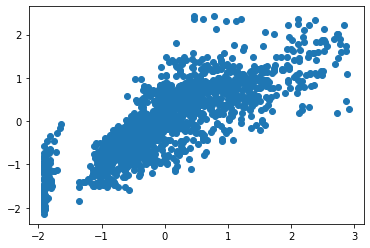

In [ ]:
#Predicting the Test set results
y_pred = regressor.predict(X_test)
plt.scatter(y_test, y_pred)

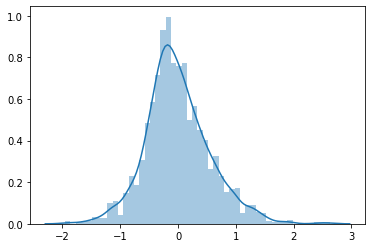

In [ ]:
sns.distplot((y_test-y_pred),bins=50)   #Flexibly plot a univariate distribution of observations.

Observation : The errors are normally distributed

Mean Abolute Error(MAE) is the mean of the absolute value of the errors.

Root Mean Squared Error(RMSE) is the square root of the mean of the squared errors.

R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. The correct R2 value depends on your study area.

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.4256788993790108
Root Mean Squared Error: 0.5578433473146853
R2 Score: 0.6800475541161142


# 10.Various Types of ML Agorithms

# 10.1 Polynomial Regression

Polynomial Regression is a form of linear regression in which the relationship between the independent variable x and dependent variable y is modeled as an nth degree polynomial.

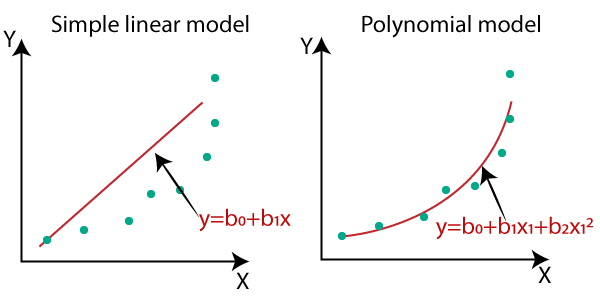

In [ ]:
#Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

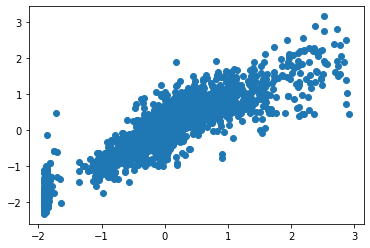

In [ ]:
#Predicting a new result with Polynomial regression
y_pred = lin_reg_2.predict(poly_reg.fit_transform(X_test))
plt.scatter(y_test,y_pred)

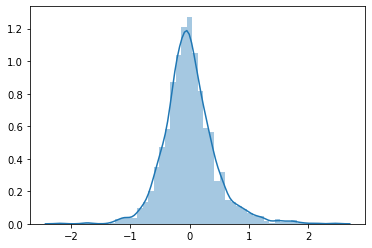

In [ ]:
#Plotting the distribution of observations
sns.distplot((y_test-y_pred),bins=50)

In [ ]:
#Finding the performance Metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.31573061752350967
Root Mean Squared Error: 0.4351456478672659
R2 Score: 0.8053160242314694


Observation : The R2 Score has improved significantly from 0.68(in the previous model) to 0.80

# 10.2 Support Vector Machine - Regression(SVR)

Support Vector Machine(SVM) is a discriminative
algorithm that tries to find the optimal hyperplane.

In a 2D space, a hyperplane is a line that optimally divides
the data points into two different classes. 

In a higher-dimensional space, the hyperplane would have
a different shape rather than a line.

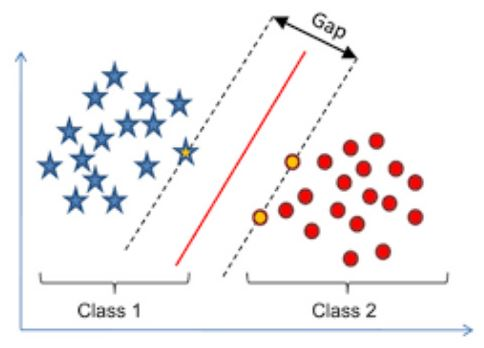

In [ ]:
#Fitting SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf') #Kernel is a function used to map a lower dimensional data into a higher dimensional data.
regressor.fit(X_train, y_train) #he radial basis function kernel, or RBF kernel, is a popular kernel function used in various kernelized learning algorithms.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

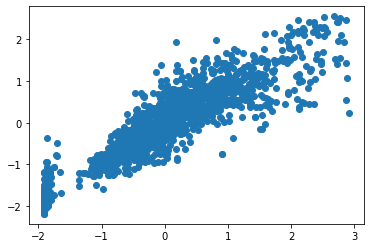

In [ ]:
#Predicting a new result
y_pred = regressor.predict(X_test)
plt.scatter(y_test, y_pred)

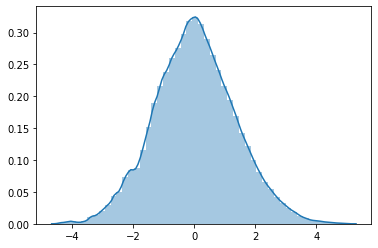

In [ ]:
#Plotting the distribution of observations
sns.distplot((y_test-y_pred),bins=50)

In [ ]:
#Finding the performance Metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.29633619416546725
Root Mean Squared Error: 0.42527355451237575
R2 Score: 0.814049362176249


# 10.3 Random Forest Regression

The Random Forest is a model based on many decision trees.Rather than just simply averaging the prediction of trees,(which we would call a "forest"), this model uses two key concepts that gives it the name random.


*   Random sampling of training data points with building trees
*   Random subset of features considered when splitting nodes

This is an Ensemble Algorithm i.e, takes into account results of more than one algorithms of the same or differnent kinds for classification or regression.

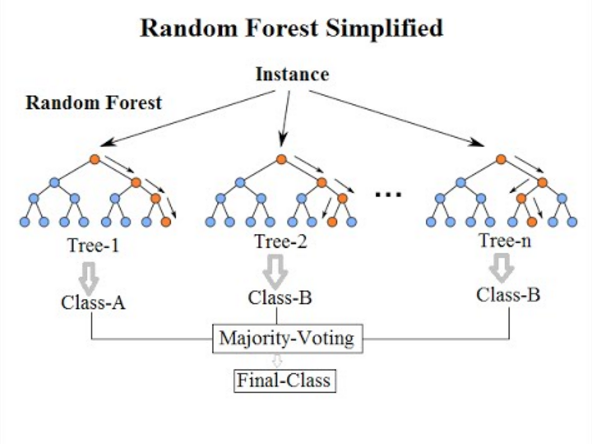

In [ ]:
#Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state=0)
regressor.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

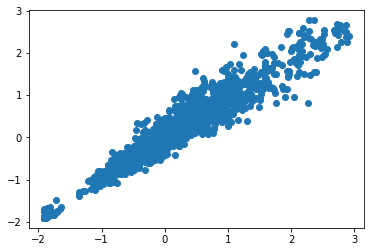

In [ ]:
#Predicting a new result
y_pred = regressor.predict(X_test)
plt.scatter(y_test, y_pred)

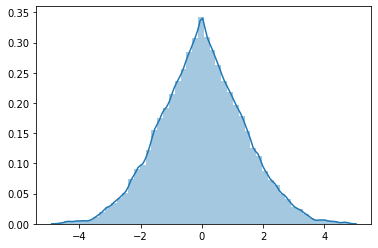

In [ ]:
#Plotting the distribution of observations
sns.distplot((y_test-y_pred),bins=50)

Observation : Here also the errors are almost normalized

In [ ]:
#Finding the performance Metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.17769704010247667
Root Mean Squared Error: 0.24743996001244517
R2 Score: 0.9370492959370332


Observation : The R2 Score is 0.94 and the MAE and RMSE are the lowest among all the models used. Thus Random Forest outperforms all the algorithms and is the winner amomg these 4 models. This is simply because Random Forest belongs to Ensemble Technique as this type of learning combines several base models
in order to produce one optimal predictive
model.

# Conclusion

Internship Studio focuses on continuous improvement and upgradation, as well as efficient and hands on training on Machine Learning. This comprehensive and project based internship has equipped us and gave an insight of the modern skills of a Data Scientist along with building some real world projects. 

# Thank You